# Fashion MNIST CNN Model

In [2]:
# references: https://www.digitalocean.com/community/tutorials/writing-cnns-from-scratch-in-pytorch

# load libraries
import torch
from torch.utils.data import random_split, DataLoader
import torch.nn as nn
from torchvision import datasets, transforms

# define variables for the model
batch_size = 64
num_classes = 10
learning_rate = 0.001
num_epochs = 20

# determine whether to use GPU or CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Data Preprocessing

In [3]:
# Normalize to [0, 1]
all_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.0,), (1.0,))
])

# Load the training dataset
full_train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=all_transforms)

# Load the testing dataset
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=all_transforms)

# Split into training and validation sets
validation_size = 10000
train_size = len(full_train_dataset) - validation_size
train_dataset, validation_dataset = random_split(full_train_dataset, [train_size, validation_size])

# Create data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
validation_loader = DataLoader(dataset=validation_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

100.0%
100.0%
100.0%
100.0%


### Explore the Dataset

In [7]:
# Print basic information
print("Training set size:", len(train_dataset))
print("Validation set size:", len(validation_dataset))
print("Test set size:", len(test_dataset))

print("Image shape:", train_dataset[0][0].shape)
print("Number of classes:", len(full_train_dataset.classes))

#checking class balance.
train_labels = [label for _, label in train_dataset]
validation_labels = [label for _, label in validation_dataset]
test_labels = [label for _, label in test_dataset]

print("training label distribution:", torch.bincount(torch.tensor(train_labels)))
print("validation label distribution:", torch.bincount(torch.tensor(validation_labels)))
print("testing label distribution:", torch.bincount(torch.tensor(test_labels)))

Training set size: 50000
Validation set size: 10000
Test set size: 10000
Image shape: torch.Size([1, 28, 28])
Number of classes: 10
training label distribution: tensor([5037, 5061, 5007, 5001, 5043, 4961, 4990, 4947, 4954, 4999])
validation label distribution: tensor([ 963,  939,  993,  999,  957, 1039, 1010, 1053, 1046, 1001])
testing label distribution: tensor([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000])


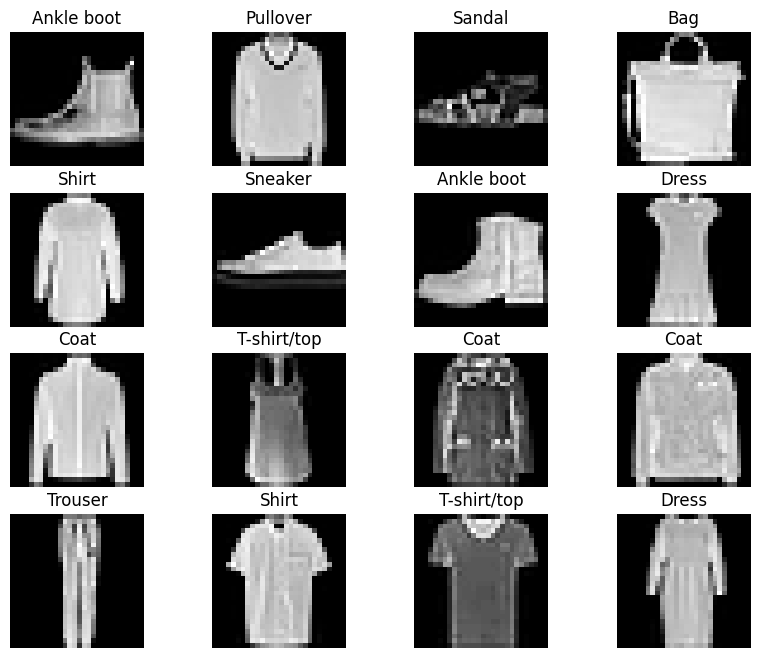

In [5]:
import matplotlib.pyplot as plt

# Get a batch of images from the training loader
view_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
images, labels = next(iter(view_loader))

# Display images
plt.figure(figsize=(10, 8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(full_train_dataset.classes[labels[i]])
    plt.axis('off')
plt.show()

## Building Model

In [ ]:
class ConvNet(nn.Module):
    # define layers and order in CNN
    def __init__(self, num_classes):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(64 * 7 * 7, 128) # 64 channels, 7x7 feature map
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)

    # pass data across layers
    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = self.pool1(out)

        out = self.conv3(out)
        out = self.conv4(out)
        out = self.pool2(out)

        # reshape output to match input of fully connected layer
        out = out.reshape(out.size(0), -1)

        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        return out

## Setting Hyperparameters

In [ ]:
model = ConvNet(num_classes).to(device)

# set loss function
criterion = nn.CrossEntropyLoss()

# Set optimizer with optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)

total_step = len(train_loader)

## Training Model

## Evaluating Model

## Fine-Tuning Model